### Importing required libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

import nltk


In [2]:
df = pd.read_csv('train_data.txt', sep=':::', names=['Title','Genre', 'Description'],engine='python')

In [3]:
df.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()


Title          0
Genre          0
Description    0
dtype: int64

In [6]:
df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
df['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [8]:
df['Genre'].value_counts()
df=df[:14000]

### Now working on EDA and Visualization

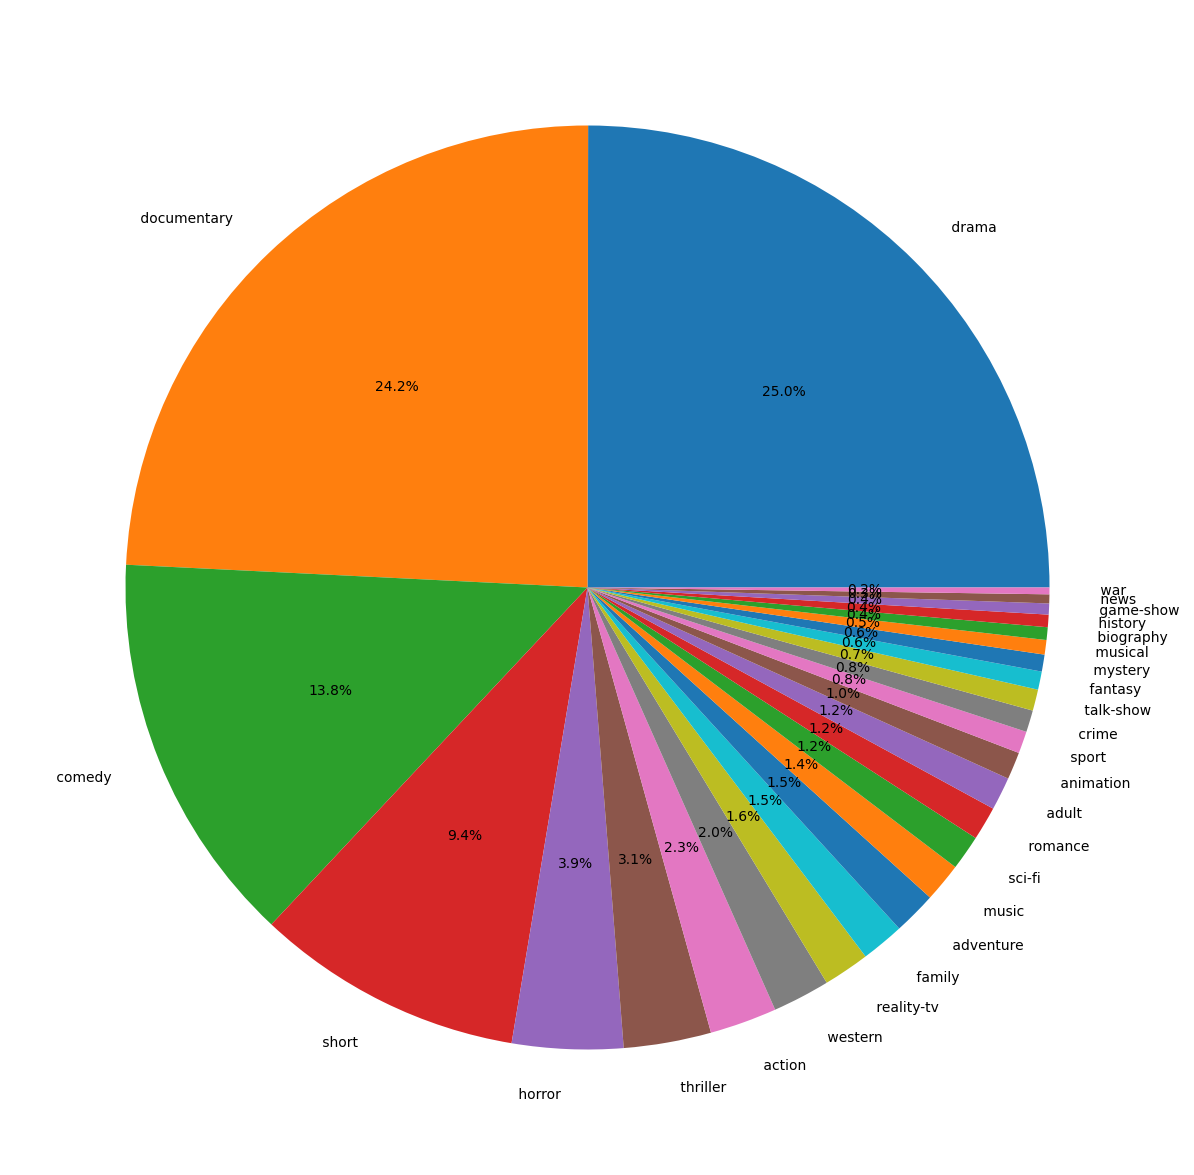

In [9]:


# Get the counts of genres
genre_counts = df['Genre'].value_counts()

# Ensure the number of labels matches the number of genres
labels = genre_counts.index.tolist()

# Plot the pie chart
plt.figure(figsize=(15, 15))
plt.pie(genre_counts, labels=labels, autopct='%0.1f%%')
plt.show()



### Working on Data Preprocessing and Text data cleaning

In [10]:

def remove_punct(text):
    import string as st
    punct = st.punctuation
    new_text = ''.join([char for char in text if char not in punct])
    return new_text

df['Description']=df['Description'].apply(lambda x:remove_punct(x))



In [11]:
df.tail()






,Title,Genre,Description
13996,Bridging the Gap: A Middle East Comedy Confer...,comedy,Hosted by Ahmed Ahmed and Avi Liberman Bridgi...
13997,Nieuw tiengemeten (2010),documentary,New Tiengemeten is the account of the transfo...
13998,That's What She Told Me (2011),short,A New York Artist accidentally summons the Gh...
13999,All Things Bakelite: The Age of Plastic (2016),documentary,All Things Bakelite a film by John Maher is a...
14000,Hanna D. - La ragazza del Vondel Park (1984),drama,Hanna is a girl completely abandoned to herse...


In [12]:
df['Description']=df['Description'].apply(lambda x:x.lower())
df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,the films title refers not only to the unreco...


In [32]:
def toknize(text):
    from nltk.tokenize import word_tokenize
    new_text = word_tokenize(text)
    return new_text
df['Description'] = df['Description'].apply(lambda x:toknize(x))

In [33]:
def stemming(text):
    from nltk import PorterStemmer
    ps = PorterStemmer().stem
    new_text = " ".join([ps(word) for word in text])
    return new_text
df['Description'] = df['Description'].apply(lambda x:stemming(x))



### Text Vectorization Using TF - IDF vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf=TfidfVectorizer(max_features=10000)

Description_tf_idf=tf_idf.fit_transform(df['Description'])

print(Description_tf_idf.shape)

Description_tf_idf=pd.DataFrame(Description_tf_idf.toarray())
Description_tf_idf.columns = tf_idf.get_feature_names_out()

Description_tf_idf 

(14000, 10000)


,10,100,1000,10000,100000,1080p,10th,10year,10yearold,11,...,zero,zeynep,zhang,zhou,zi,zoe,zombi,zone,zoo,zubaida
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168558,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.130734,...,0.166233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df['Description len'] = df['Description'].apply(lambda x:len(x)-x.count(' '))
df.head()

,Title,Genre,Description,Description len,Description_len_sclr
1,Oscar et la dame rose (2009),drama,listen in to a conver between hi doctor and pa...,385,0.047919
2,Cupid (1997),thriller,a brother and sister with a past incestu relat...,142,0.014631
3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...,456,0.056913
4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...,793,0.102148
5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...,450,0.056107


### Split Data and Train a model 

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Description_len_sclr'] = scaler.fit_transform(df['Description len'].values.reshape(-1, 1))
df.head()

,Title,Genre,Description,Description len,Description_len_sclr
1,Oscar et la dame rose (2009),drama,listen in to a conver between hi doctor and pa...,385,0.047703
2,Cupid (1997),thriller,a brother and sister with a past incestu relat...,142,0.014772
3,"Young, Wild and Wonderful (1980)",adult,as the bu empti the student for their field tr...,456,0.057325
4,The Secret Sin (1915),drama,to help their unemploy father make end meet ed...,793,0.102995
5,The Unrecovered (2007),drama,the film titl refer not onli to the unrecov bo...,450,0.056512


In [41]:
target = df['Genre']
feature=df.drop(['Genre', 'Title','Description', 'Description len'],axis=1)

In [42]:
target

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
13996          comedy 
13997     documentary 
13998           short 
13999     documentary 
14000           drama 
Name: Genre, Length: 14000, dtype: object

In [43]:
feature

,Description_len_sclr
1,0.047703
2,0.014772
3,0.057325
4,0.102995
5,0.056512
...,...
13996,0.024529
13997,0.044857
13998,0.074265
13999,0.041740


In [44]:
Description_tf_idf.head()

,10,100,1000,10000,100000,1080p,10th,10year,10yearold,11,...,zero,zeynep,zhang,zhou,zi,zoe,zombi,zone,zoo,zubaida
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168558,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.130734,...,0.166233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from scipy.sparse import csr_matrix

# Assuming Description_tf_idf is a sparse matrix (like from TfidfVectorizer)
Description_tf_idf_sparse = csr_matrix(Description_tf_idf)

# Convert it to a sparse DataFrame
Description_tf_idf_sparse_df = pd.DataFrame.sparse.from_spmatrix(Description_tf_idf_sparse)

# Concatenate sparse DataFrame to the feature DataFrame
feature.reset_index(drop=True, inplace=True)
Description_tf_idf_sparse_df.reset_index(drop=True, inplace=True)

# Concatenate using sparse DataFrame
feature = pd.concat([feature, Description_tf_idf_sparse_df], axis=1)


In [46]:
feature.shape

(14000, 10001)

In [47]:
feature.head()

,Description_len_sclr,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.047703,0,0,0,0,0,0,0,0,0.168558,...,0,0,0,0,0,0,0,0,0,0
1,0.014772,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.057325,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.102995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.056512,0,0,0,0,0,0,0,0,0,...,0.166233,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)



In [49]:
print('X_train:',X_train.shape, 'X_test: ', X_test.shape, 'y_train:',y_train.shape, 'y_test: ', y_test.shape)

X_train: (11200, 10001) X_test:  (2800, 10001) y_train: (11200,) y_test:  (2800,)


In [50]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score


In [51]:
model = RandomForestClassifier(n_estimators=150, max_depth=50)


In [52]:
X_train = X_train.astype('float16')  # or 'float16' if precision loss is acceptable
X_train.columns = X_train.columns.astype(str)



# Fit the model on the reduced data
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=50, n_estimators=150)

In [53]:
model.score(X_train,y_train)

0.9938392857142857

In [56]:

from sklearn.decomposition import PCA
feature.columns = feature.columns.astype(str)
# If your features are numeric, reduce dimensions
pca = PCA(n_components=100)  # Reduce to 100 components
feature_reduced = pca.fit_transform(feature)# Ensure feature column names are all strings



# Now perform cross-validation
k_fold = KFold(n_splits=3)
cross_val_score(model, feature, target, cv=k_fold, scoring='accuracy', n_jobs=-1, error_score='raise')



E:\programming\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([0.44846797, 0.44353975, 0.45906558])

In [61]:
import pickle

# Assuming `model`, `tfidf`, and `pca` are your trained model objects

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tf_idf, f)

# Save the PCA model
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)
